<a href="https://colab.research.google.com/github/EnocPinto/Google-Colab/blob/main/Human_activity_classification_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#The dataset can be downloaded by using the following commands within a colab notebook
# specify the data file name and url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/'
datafile = url + 'UCI%20HAR%20Dataset.zip'
# download the zip file from the web server using curl
!curl $datafile --output UCI_HAR_Dataset.zip
# unzip the file
!unzip -qq UCI_HAR_Dataset.zip
# change the directory name to remove spaces
!mv -f UCI\ HAR\ Dataset UCI_HAR_DATASET

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58.1M  100 58.1M    0     0  86.6M      0 --:--:-- --:--:-- --:--:-- 86.6M


In [2]:
#Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

**QUESTION 1**: Read the files and describe the dataset

In [3]:
#Read "activity_labels.txt" file and print its content
activity_labels = open("activity_labels.txt", "r")
activity_labels_conent = activity_labels.read()
print(activity_labels_conent)

1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING



In [ ]:
#Read "features.txt" file and print its content
features = open("features.txt", "r")
features_conent = features.read()
#print(features_conent)

In [5]:
#Read "features_info.txt" file and print its content
features_info = open("features_info.txt", "r")
features_info_conent = features_info.read()
print(features_info_conent) 

Feature Selection 

The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally a Fast Fourier Transform (FFT) was applied to some of these signals pro

The data given for this assignment contains information from 30 people performing different activities while carrying a smart phone of their waists. The aim of the data gathered from this 30 people is to try to predict if the person is walking, walking upstairs, walking downstairs, sitting, standing or laying. 

The data was recorded using the gyroscope and accelerometer of the smart phone, capturing '3-axial linear acceleration'(tAcc-XYZ) and '3-axial angular velocity' (tGyro-XYZ). 

For each of the records we have:
-	The Triaxial acceleration and angular velocity. 
-	561 features. 
-	Activity label
-	An identifier of the subject that participate in the experiment. 

It is important to keep in mind that the: 
-	The features have been normalise. 
-	The units used for accelerations are g’s
-	The gyroscope units are rad/seg.

Finally the data collected has been split into training (70%) and test (30%). 



**QUESTION 2**: Plot one example of walking, sitting, standing, and laying for a randomly chosen data sample. 

In [6]:
#Load test and train data
xtest = np.loadtxt("X_test.txt")
ytest = np.loadtxt("y_test.txt")-1

xtrain = np.loadtxt("X_train.txt")
ytrain = np.loadtxt("y_train.txt")-1

#Load internal signals
xx = np.loadtxt("body_acc_x_test.txt")
yy = np.loadtxt("body_acc_y_test.txt")
zz = np.loadtxt("body_acc_z_test.txt")


In [8]:
#Dededuct one from each activity label so each stage is 0 index
WALKING = 1-1
WALKING_UPSTAIRS = 2-1
WALKING_DOWNSTAIRS = 3-1
SITTING = 4-1
STANDING = 5-1
LAYING = 6-1

In [9]:
#Print features and shape of test and train data sets 
print(np.unique(ytest))
print('x_test = ' + str(xtest.shape))
print('y_test = ' + str(ytest.shape))
print('x_train = ' + str(xtrain.shape))
print('y_train = ' + str(ytrain.shape))

[0. 1. 2. 3. 4. 5.]
x_test = (2947, 561)
y_test = (2947,)
x_train = (7352, 561)
y_train = (7352,)


Text(0, 0.5, 'Body accelaration')

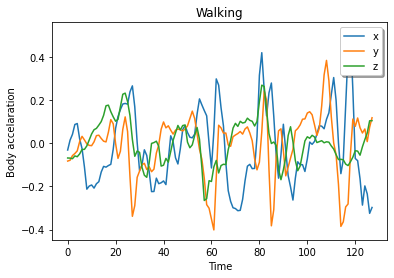

In [10]:
#Plot Walking feature
random_ts = np.random.choice(np.where(ytest==WALKING)[0])
plt.plot(xx[random_ts])
plt.plot(yy[random_ts])
plt.plot(zz[random_ts])
plt.legend(("x", "y", "z"), loc = "upper right", shadow = True)
plt.title("Walking")
plt.xlabel("Time")
plt.ylabel("Body accelaration")

Text(0, 0.5, 'Body accelaration')

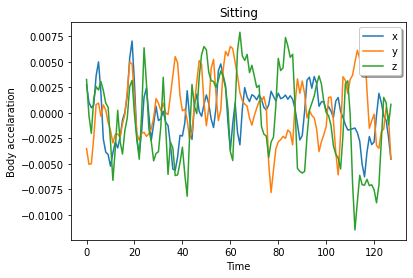

In [11]:
#Plot Sitting feature
random_ts = np.random.choice(np.where(ytest==SITTING)[0])
plt.plot(xx[random_ts])
plt.plot(yy[random_ts])
plt.plot(zz[random_ts])
plt.legend(("x", "y", "z"), loc = "upper right", shadow = True)
plt.title("Sitting")
plt.xlabel("Time")
plt.ylabel("Body accelaration")

Text(0, 0.5, 'Body accelaration')

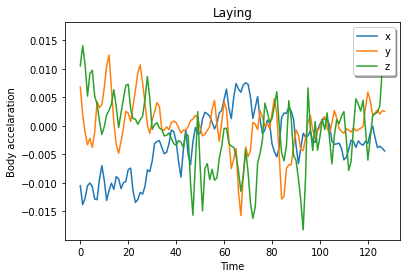

In [12]:
#Plot Laying feature
random_ts = np.random.choice(np.where(ytest==LAYING)[0])
plt.plot(xx[random_ts])
plt.plot(yy[random_ts])
plt.plot(zz[random_ts])
plt.legend(("x", "y", "z"), loc = "upper right", shadow = True)
plt.title("Laying")
plt.xlabel("Time")
plt.ylabel("Body accelaration")

**QUESTION 3 & 4**: Write Tensorflow code for performing multiclass logistic regression. Train the model using Stochastic Gradient Descent. Plot the the loss over time and calculate the prediction accuracy on the training and test datasets.

In [13]:
#Covert data into a tensor
xtrain = tf.convert_to_tensor(xtrain, tf.float32)

#Covert classes to categorical variables
ytrain_categorical = tf.cast(tf.keras.utils.to_categorical(ytrain), tf.float32)

In [14]:
print('x_train = ' + str(xtrain.shape))
print('y_train = ' + str(ytrain_categorical.shape))

x_train = (7352, 561)
y_train = (7352, 6)


In [15]:
#Define the logistic regresion model
#Initialize the weights
W = tf.Variable(tf.zeros([561, 6]), tf.float64) 
b = tf.Variable(tf.zeros([6]), tf.float64)

#Define the prediction function
def Y_pred(X):
  return tf.nn.softmax(tf.add(tf.matmul(X,W), b))


In [16]:
#Define the loss function - Categorical cross-entropy function
@tf.function
def loss(y_pred, y_true):
  y_pred = tf.clip_by_value(y_pred, 1e-9, 1,)
  #Compute corss-entropy
  return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))

In [17]:
#Set up the optimizer - SGD
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3)

#Define the training function to compute prediction, loss and gradient updates
def train(x, y):
  with tf.GradientTape() as tape:
    #Prediction
    predicted = Y_pred(x)
    #Loss
    current_loss = loss(predicted, y)
    #Calculate gradient
    gradients = tape.gradient(current_loss, [W, b])
    #Weight update
    optimizer.apply_gradients(zip(gradients, [W, b]))
  return current_loss

In [18]:
#Set up paraments for the test
n_iters = 5000
loss_history = np.zeros(n_iters)

#Train the clasifer for 5.000 epochs
epochs = range(n_iters)
for epoch in epochs:
  training_loss = train(xtrain, ytrain_categorical)
  loss_history[epoch] = training_loss.numpy()
  if epoch%100 == 0:
    print('Training Step:' + str(epoch) + '  Loss = ' + str(training_loss))

Training Step:0  Loss = tf.Tensor(1.7917526, shape=(), dtype=float32)
Training Step:100  Loss = tf.Tensor(1.4607794, shape=(), dtype=float32)
Training Step:200  Loss = tf.Tensor(1.29292, shape=(), dtype=float32)
Training Step:300  Loss = tf.Tensor(1.1786915, shape=(), dtype=float32)
Training Step:400  Loss = tf.Tensor(1.0939217, shape=(), dtype=float32)
Training Step:500  Loss = tf.Tensor(1.0271488, shape=(), dtype=float32)
Training Step:600  Loss = tf.Tensor(0.97238034, shape=(), dtype=float32)
Training Step:700  Loss = tf.Tensor(0.9261703, shape=(), dtype=float32)
Training Step:800  Loss = tf.Tensor(0.8863719, shape=(), dtype=float32)
Training Step:900  Loss = tf.Tensor(0.85155886, shape=(), dtype=float32)
Training Step:1000  Loss = tf.Tensor(0.82073325, shape=(), dtype=float32)
Training Step:1100  Loss = tf.Tensor(0.79316825, shape=(), dtype=float32)
Training Step:1200  Loss = tf.Tensor(0.7683174, shape=(), dtype=float32)
Training Step:1300  Loss = tf.Tensor(0.7457581, shape=(), dty

In [19]:
#Training accuracy
y_prob = Y_pred(xtrain) #Calculate the probability for each type of activity
print("\nCurrent output verctor shape (Training): ", y_prob.shape)
print("\nTraining label shape (Training): ", ytrain.shape)
y_pred = np.argmax(y_prob, axis = 1) #Get the index of the max value for each observation
print("\nTraining accuracy: ", np.sum(y_pred == ytrain)/len(ytrain)) #Compare predicted and train value and calculate accuracy

#Same as above but using the test data instead
xtest = tf.convert_to_tensor(xtest, tf.float32)
y_prob = Y_pred(xtest)
print("\nCurrent output verctor shape (Test): ", y_prob.shape)
print("\nTest label shape: ", ytest.shape)
y_pred = np.argmax(y_prob, axis = 1)
print("\nTest accuracy: ", np.sum(y_pred == ytest)/len(ytest))


Current output verctor shape (Training):  (7352, 6)

Training label shape (Training):  (7352,)

Training accuracy:  0.8956746463547334

Current output verctor shape (Test):  (2947, 6)

Test label shape:  (2947,)

Test accuracy:  0.8836104513064132


In [20]:
def accuracy(x, y):
  y_ = Y_pred(x)
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  #Calculate the accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_preduction), "float")
  return accuracy

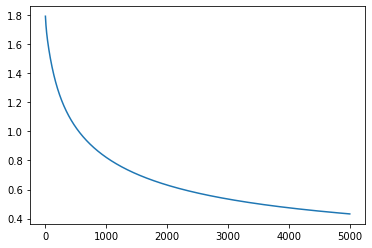

In [21]:
plt.plot(loss_history)
plt.show()

**QUESTION 5**: Repeat the optimization task above except this time use the Adam optimizer

In [22]:
#Define the logistic regresion model
#Initialize the weights
W = tf.Variable(tf.zeros([561, 6]), tf.float64)
b = tf.Variable(tf.zeros([6]), tf.float64)

#Define the prediction function
def Y_pred(X):
  return tf.nn.softmax(tf.add(tf.matmul(X,W), b))

In [23]:
#Define the loss function - Categorical cross-entropy function
def loss(y_pred, y_true):
  y_pred = tf.clip_by_value(y_pred, 1e-9, 1,)
  #Compute corss-entropy
  return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))

In [24]:
#Set up the optimizer - Adam
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)

#Define the training function to compute prediction, loss and gradient updates
def train(x, y):
  with tf.GradientTape() as tape:
    #Prediction
    predicted = Y_pred(x)
    #Loss
    current_loss = loss(predicted, y)
    #Calculate gradient
    gradients = tape.gradient(current_loss, [W, b])
    #Weight update
    optimizer.apply_gradients(zip(gradients, [W, b]))
  return current_loss

In [26]:
#Set up paraments for the test
n_iters = 5000
loss_history = np.zeros(n_iters)

#Train the clasifer for 5.000 epochs
epochs = range(n_iters)
for epoch in epochs:
  training_loss = train(xtrain, ytrain_categorical)
  loss_history[epoch] = training_loss.numpy()
  if epoch%100 == 0:
    print('Training Step:' + str(epoch) + '  Loss = ' + str(training_loss))

Training Step:0  Loss = tf.Tensor(1.7917526, shape=(), dtype=float32)
Training Step:100  Loss = tf.Tensor(0.47997206, shape=(), dtype=float32)
Training Step:200  Loss = tf.Tensor(0.3141265, shape=(), dtype=float32)
Training Step:300  Loss = tf.Tensor(0.2414277, shape=(), dtype=float32)
Training Step:400  Loss = tf.Tensor(0.1990657, shape=(), dtype=float32)
Training Step:500  Loss = tf.Tensor(0.17079064, shape=(), dtype=float32)
Training Step:600  Loss = tf.Tensor(0.15035324, shape=(), dtype=float32)
Training Step:700  Loss = tf.Tensor(0.13477644, shape=(), dtype=float32)
Training Step:800  Loss = tf.Tensor(0.12244324, shape=(), dtype=float32)
Training Step:900  Loss = tf.Tensor(0.11239385, shape=(), dtype=float32)
Training Step:1000  Loss = tf.Tensor(0.104020394, shape=(), dtype=float32)
Training Step:1100  Loss = tf.Tensor(0.09691784, shape=(), dtype=float32)
Training Step:1200  Loss = tf.Tensor(0.09080525, shape=(), dtype=float32)
Training Step:1300  Loss = tf.Tensor(0.085481174, sha

In [27]:
#Training accuracy
y_prob = Y_pred(xtrain)
print("\nCurrent output verctor shape (Training): ", y_prob.shape)
print("\nTraining label shape (Training): ", ytrain.shape)
y_pred = np.argmax(y_prob, axis = 1)
print("\nTraining accuracy: ", np.sum(y_pred == ytrain)/len(ytrain))

#Test accuracy
xtest = tf.convert_to_tensor(xtest, tf.float32)
y_prob = Y_pred(xtest)
print("\nCurrent output verctor shape (Test): ", y_prob.shape)
print("\nTest label shape: ", ytest.shape)
y_pred = np.argmax(y_prob, axis = 1)
print("\nTest accuracy: ", np.sum(y_pred == ytest)/len(ytest))


Current output verctor shape (Training):  (7352, 6)

Training label shape (Training):  (7352,)

Training accuracy:  0.9911588683351469

Current output verctor shape (Test):  (2947, 6)

Test label shape:  (2947,)

Test accuracy:  0.9558873430607397


In [28]:
def accuracy(x, y):
  y_ = Y_pred(x)
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  #Calculate the accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_preduction), "float")
  return accuracy

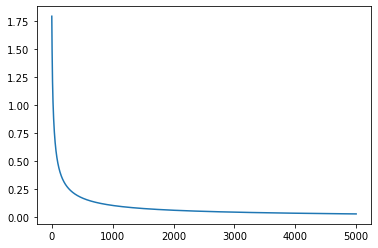

In [29]:
plt.plot(loss_history)
plt.show()

**QUESTION 6**: Explain the differences you observe between the two different optimizers

The Adam optimizer performs better than the SGD optimizer in both train and test data sets. With SGD, we obtain 89% and 88% accuracy, respectively, while with Adam, the accuracy increases to 99% on the test data and 95% on the train data. Also, from the plot of the loss function, we can see that the model with the Adam optimizer is able to learn much quicker compared to the model that uses the SGD optimizer with the loss plateauing after 2000 iterations, while for SGD after 5000 iterations, it seems the model can further reduce the loss. 

**QUESTION 7 & 8**: find the 50 features for each class that have the largest absolute value weights and optimize the model using the features you’ve found

In [30]:
#Select 50 features for each class that have the largest absolute value weights
aa, bb = tf.math.top_k(tf.linalg.matrix_transpose(tf.math.abs(W)), k = 50)
bb = tf.reshape(bb, [-1])
cc, _ = tf.unique(bb)
n_feat = cc.shape[0]
tf.sort(cc, axis = -1, direction = "ASCENDING", name = None)

<tf.Tensor: shape=(145,), dtype=int32, numpy=
array([  0,   1,   2,  22,  23,  24,  26,  27,  28,  32,  35,  36,  37,
        38,  39,  40,  41,  49,  50,  52,  53,  55,  56,  57,  58,  62,
        63,  64,  65,  66,  80,  81,  82,  89,  90,  92,  93,  94, 104,
       106, 107, 108, 109, 111, 114, 115, 117, 118, 119, 120, 121, 122,
       132, 141, 142, 143, 145, 146, 147, 148, 149, 151, 152, 156, 157,
       158, 159, 160, 161, 162, 166, 169, 171, 179, 181, 182, 183, 185,
       186, 187, 188, 189, 190, 191, 192, 194, 197, 198, 199, 201, 202,
       203, 214, 215, 216, 233, 235, 237, 238, 243, 246, 247, 249, 250,
       251, 261, 262, 263, 264, 275, 294, 296, 371, 376, 433, 445, 446,
       449, 450, 451, 452, 453, 454, 455, 458, 459, 474, 489, 502, 503,
       504, 505, 507, 512, 513, 525, 526, 527, 537, 551, 552, 553, 555,
       558, 559], dtype=int32)>

In [31]:
features = np.loadtxt("features.txt", dtype = np.object)

for i in cc.numpy():
  print(features[i,1])

tBodyAcc-mean()-Y
tBodyGyroJerk-correlation()-X,Z
tBodyGyroJerk-correlation()-X,Y
tBodyAccJerk-arCoeff()-X,4
tBodyGyroJerkMag-arCoeff()1
tBodyAccJerk-correlation()-X,Z
tBodyAcc-correlation()-X,Y
tBodyAccJerk-correlation()-X,Y
tBodyAccJerkMag-arCoeff()3
tBodyGyro-mean()-Z
tBodyGyroJerk-correlation()-Y,Z
fBodyGyro-maxInds-Z
tBodyGyro-iqr()-Z
tGravityAcc-entropy()-X
tBodyGyro-correlation()-X,Y
tBodyAccJerk-mean()-X
tBodyGyroMag-arCoeff()4
fBodyAccJerk-maxInds-Z
tBodyGyroMag-arCoeff()3
tBodyGyroJerkMag-arCoeff()3
tBodyGyro-correlation()-Y,Z
fBodyBodyGyroMag-maxInds
tBodyAcc-arCoeff()-X,4
tBodyAccMag-std()
tGravityAccMag-std()
tBodyGyro-entropy()-Y
tBodyGyro-min()-X
fBodyAccMag-mean()
fBodyAccMag-sma()
fBodyAcc-skewness()-X
fBodyAccMag-std()
tGravityAcc-arCoeff()-X,1
tBodyAccMag-max()
tGravityAccMag-max()
fBodyGyro-max()-Y
tBodyAcc-correlation()-Y,Z
fBodyGyro-maxInds-Y
fBodyAccMag-mad()
tBodyGyro-correlation()-X,Z
fBodyGyro-bandsEnergy()-1,8
tBodyAccMag-mad()
tGravityAccMag-mad()
fBodyAccMa

In [32]:
#Select train and test data based on top 50 features
x_train_50 = tf.gather(xtrain, cc, axis = 1)
x_test_50 = tf.gather(xtest, cc, axis = 1)
x_test_50

<tf.Tensor: shape=(2947, 145), dtype=float32, numpy=
array([[-0.02328523, -0.15534633,  0.12400875, ...,  0.30447876,
         0.49172843,  0.16291982],
       [-0.01316336, -0.17115207,  0.28485042, ..., -0.25754482,
         0.23919281,  0.01749957],
       [-0.02605042, -0.17700262,  0.16167165, ...,  0.1419333 ,
         0.08525316,  0.20230202],
       ...,
       [ 0.03007744, -0.0140846 ,  0.11403496, ..., -0.15456198,
         0.24711934,  0.08857407],
       [ 0.01846687,  0.12001437, -0.24816412, ..., -0.03687556,
         0.29352066, -0.8191877 ],
       [-0.01843651, -0.02830341, -0.4560287 , ...,  0.17337222,
         0.03821483, -0.28795066]], dtype=float32)>

In [33]:
#Define the logistic regresion model
#Initialize the weights
W = tf.Variable(tf.zeros([n_feat, 6]), tf.float64)
b = tf.Variable(tf.zeros([6]), tf.float64)

def Y_pred(X):
  return tf.nn.softmax(tf.add(tf.matmul(X,W), b))


In [34]:
#Define the loss function - Categorical cross-entropy function
def loss(y_pred, y_true):
  y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
  #Compute corss-entropy
  return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))

In [35]:
#Set up the optimizer - Adam
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)

#Define the training function to compute prediction, loss and gradient updates
def train(x, y):
  with tf.GradientTape() as tape:
    #Prediction
    predicted = Y_pred(x)
    #Loss
    current_loss = loss(predicted, y)
    #Calculate gradient
    gradients = tape.gradient(current_loss, [W, b])
    #Weight update
    optimizer.apply_gradients(zip(gradients, [W, b]))
  return current_loss

In [36]:
#Set up paraments for the test
n_iters = 5000

loss_history = np.zeros(n_iters)

#Train the clasifer for 5.000 epochs
epochs = range(n_iters)
for epoch in epochs:
  training_loss = train(x_train_50, ytrain_categorical)
  loss_history[epoch] = training_loss.numpy()
  if epoch%100 == 0:
    print('Training Step:' + str(epoch) + '  Loss = ' + str(training_loss))

Training Step:0  Loss = tf.Tensor(1.7917526, shape=(), dtype=float32)
Training Step:100  Loss = tf.Tensor(0.8044601, shape=(), dtype=float32)
Training Step:200  Loss = tf.Tensor(0.5274935, shape=(), dtype=float32)
Training Step:300  Loss = tf.Tensor(0.39733195, shape=(), dtype=float32)
Training Step:400  Loss = tf.Tensor(0.3219607, shape=(), dtype=float32)
Training Step:500  Loss = tf.Tensor(0.27243796, shape=(), dtype=float32)
Training Step:600  Loss = tf.Tensor(0.23715258, shape=(), dtype=float32)
Training Step:700  Loss = tf.Tensor(0.21060619, shape=(), dtype=float32)
Training Step:800  Loss = tf.Tensor(0.18985085, shape=(), dtype=float32)
Training Step:900  Loss = tf.Tensor(0.17315073, shape=(), dtype=float32)
Training Step:1000  Loss = tf.Tensor(0.15940896, shape=(), dtype=float32)
Training Step:1100  Loss = tf.Tensor(0.14789452, shape=(), dtype=float32)
Training Step:1200  Loss = tf.Tensor(0.13809964, shape=(), dtype=float32)
Training Step:1300  Loss = tf.Tensor(0.12966008, shape

In [37]:
#Training accuracy
y_prob = Y_pred(x_train_50)
print("\nCurrent output verctor shape (Training): ", y_prob.shape)
print("\nTraining label shape (Training): ", ytrain.shape)
y_pred = np.argmax(y_prob, axis = 1)
print("\nTraining accuracy: ", np.sum(y_pred == ytrain)/len(ytrain))

#Test accuracy
xtest = tf.convert_to_tensor(xtest, tf.float32)
y_prob = Y_pred(x_test_50)
print("\nCurrent output verctor shape (Test): ", y_prob.shape)
print("\nTest label shape: ", ytest.shape)
y_pred = np.argmax(y_prob, axis = 1)
print("\nTest accuracy: ", np.sum(y_pred == ytest)/len(ytest))


Current output verctor shape (Training):  (7352, 6)

Training label shape (Training):  (7352,)

Training accuracy:  0.9868063112078346

Current output verctor shape (Test):  (2947, 6)

Test label shape:  (2947,)

Test accuracy:  0.9345096708517137


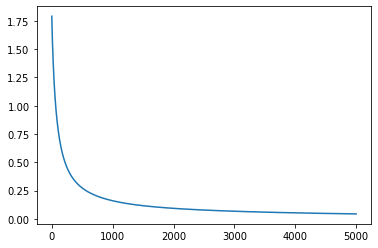

In [38]:
plt.plot(loss_history)
plt.show()